In [1]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
tf.random.get_seed(1000)

(87654321, 1000)

In [26]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000,start_char=1)

# restore np.load for future normal usage
np.load = np_load_old

In [18]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(train_data.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [6]:
mydict = imdb.get_word_index()

In [7]:
len(mydict)

88584

In [8]:
reverse_word_index = dict([(v,k) for (k, v) in mydict.items()])

In [9]:
sample_idx = 0
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[sample_idx]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [80]:
reverse_word_index.get(0,'?') # 없으면 ? 를 받아와라

'?'

In [83]:
reverse_word_index[1]

'the'

In [ ]:
train_data[sample_idx]

In [74]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 결과를 저장할 0 행렬 생성
    print()
    for i, sequence in enumerate(sequences):
        print(i,sequence)
        results[i, sequence] = 1 # 문장에 존재하는 단어들만 one-hot encoding
    return results

In [ ]:
tmp = vectorize_sequences(train_data[0])
train_data[0]

In [70]:
results = np.zeros((2, 2))

In [71]:
results

array([[0., 0.],
       [0., 0.]])

In [11]:
df = pd.DataFrame(train_data)

In [12]:
df2 = pd.DataFrame(X_train)

NameError: name 'X_train' is not defined

In [84]:
sorted(train_data[0])

[1,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 9,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 18,
 18,
 18,
 19,
 19,
 21,
 22,
 22,
 22,
 22,
 22,
 22,
 25,
 25,
 25,
 25,
 26,
 26,
 26,
 28,
 28,
 30,
 32,
 32,
 32,
 33,
 33,
 35,
 36,
 36,
 36,
 36,
 38,
 38,
 38,
 38,
 39,
 43,
 43,
 43,
 43,
 46,
 48,
 50,
 50,
 51,
 51,
 52,
 56,
 62,
 65,
 65,
 66,
 66,
 71,
 71,
 76,
 77,
 82,
 87,
 88,
 88,
 92,
 98,
 100,
 103,
 104,
 104,
 106,
 107,
 112,
 112,
 113,
 117,
 124,
 130,
 134,
 135,
 141,
 144,
 147,
 150,
 167,
 172,
 172,
 173,
 178,
 192,
 194,
 215,
 224,
 226,
 226,
 256,
 256,
 283,
 284,
 297,
 316,
 317,
 336,
 381,
 385,
 386,
 400,
 407,
 447,
 458,
 469,
 476,
 476,
 480,
 480,
 480,
 515,
 530,
 530,
 530,
 546,
 619,
 626,
 670,
 723,
 838,
 973,
 102

In [81]:
df.head()

,0
0,"[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, ..."
1,"[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463,..."
2,"[1, 14, 47, 8, 30, 31, 7, 4, 249, 108, 7, 4, 5..."
3,"[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153,..."
4,"[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637, 1..."


In [82]:
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
results[1,1]=1

In [73]:
results

array([[0., 0.],
       [0., 1.]])

In [50]:
tmp[0]

array([0., 1., 0., ..., 0., 0., 0.])

In [16]:
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

NameError: name 'vectorize_sequences' is not defined

In [33]:
len(train_data[1])

189

In [32]:
len(X_train[0])

10000

In [120]:
type(train_labels[0])

numpy.int64

In [14]:
y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

In [15]:
X_valid = X_train[:10000]
X_train = X_train[10000:]
y_valid = y_train[:10000]
y_train = y_train[10000:]

NameError: name 'X_train' is not defined

In [127]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(10000, 10000)
(10000,)
(25000, 10000)
(25000,)


In [130]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [148]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [149]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 10000 samples
Epoch 1/20
25000/25000 [==============================] - 7s 273us/sample - loss: 0.0065 - acc: 0.9986 - val_loss: 0.0013 - val_acc: 0.9999
Epoch 2/20
25000/25000 [==============================] - 7s 273us/sample - loss: 0.0022 - acc: 0.9997 - val_loss: 9.7561e-04 - val_acc: 0.9999
Epoch 3/20
25000/25000 [==============================] - 7s 290us/sample - loss: 0.0023 - acc: 0.9995 - val_loss: 5.4449e-04 - val_acc: 0.9999
Epoch 4/20
25000/25000 [==============================] - 7s 279us/sample - loss: 0.0011 - acc: 0.9998 - val_loss: 3.9445e-04 - val_acc: 0.9999
Epoch 5/20
25000/25000 [==============================] - 6s 228us/sample - loss: 0.0019 - acc: 0.9995 - val_loss: 2.1117e-04 - val_acc: 1.0000
Epoch 6/20
25000/25000 [==============================] - 6s 229us/sample - loss: 0.0017 - acc: 0.9997 - val_loss: 1.4736e-04 - val_acc: 1.0000
Epoch 7/20
25000/25000 [==============================] - 6s 234us/sample - loss: 0.0015 -

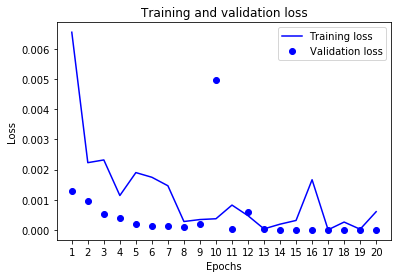

In [150]:
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss') # 'b'는 파란색 실선을 의미
plt.plot(epochs, val_loss, 'bo', label='Validation loss') # 'bo'는 파란색 점을 의미
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

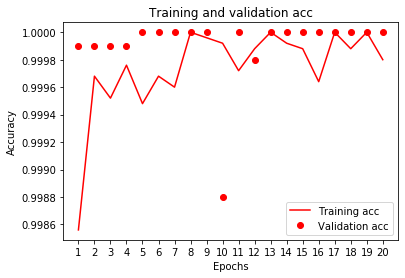

In [151]:
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()

plt.show()

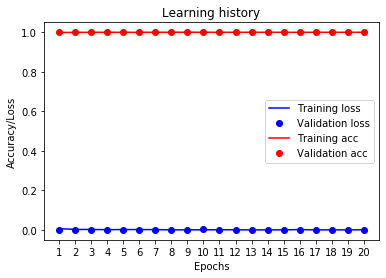

In [152]:
loss, val_loss = history.history['loss'], history.history['val_loss']
acc, val_acc = history.history['acc'], history.history['val_acc']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'ro', label='Validation acc')
plt.title('Learning history')
plt.xlabel('Epochs')
plt.ylabel('Accuracy/Loss')
plt.xticks(epochs)
plt.legend()

plt.show()

In [139]:

test_loss, test_acc = model.evaluate(X_test, y_test)
print('test loss(20 epochs): ', test_loss)
print('test acc(20 epochs): ', test_acc)

25000/25000 [==============================] - 5s 193us/sample - loss: 1.1734 - acc: 0.8474
test loss(20 epochs):  1.173359564346075
test acc(20 epochs):  0.8474


In [170]:
# 기존 model 객체를 사용하면 이어서 학습되므로, 새로운 model 객체를 생성함
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(X_train, 
                    y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(X_valid, y_valid))

Train on 25000 samples, validate on 10000 samples
Epoch 1/3
25000/25000 [==============================] - 9s 346us/sample - loss: 0.3906 - acc: 0.8450 - val_loss: 0.2203 - val_acc: 0.9211
Epoch 2/3
25000/25000 [==============================] - 6s 233us/sample - loss: 0.2157 - acc: 0.9199 - val_loss: 0.1628 - val_acc: 0.9434
Epoch 3/3
25000/25000 [==============================] - 6s 251us/sample - loss: 0.1720 - acc: 0.9362 - val_loss: 0.1276 - val_acc: 0.9586


In [153]:
# 여러 개 동시에 예측
result = model.predict(X_test)
print(result)

print()

# 하나씩 개 동시에 예측
sample = X_test[0]
result = model.predict(np.expand_dims(sample, axis=0))
print(result)

[[1.4603138e-06]
 [1.0000000e+00]
 [1.0000000e+00]
 ...
 [4.1794777e-04]
 [6.7371130e-04]
 [9.9999380e-01]]

[[1.4824711e-06]]


In [186]:
for i in range(10):
    sample = X_test[i]
    result = model.predict(np.expand_dims(sample, axis=0))
    print('%d : %.0f \t :%.4f'%(i,result,result))

0 : 0 	 :0.1486
1 : 1 	 :0.9996
2 : 1 	 :0.9630
3 : 1 	 :0.9400
4 : 1 	 :0.9708
5 : 1 	 :0.9176
6 : 1 	 :0.9999
7 : 0 	 :0.0052
8 : 1 	 :0.9756
9 : 1 	 :0.9990


In [158]:
k  = 0.12345

In [6]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
reverse_word_index[14]

'as'